### Decision Trees
- Non-parametric technique for classification & regression
- Simple to understand, interpret & visualize using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree). 
- Export results to [Graphviz](https://www.graphviz.org/) format using [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). Import via `conda install python-graphviz`.
- Requires little data prep.
- Computational cost is logarithmic, ie log(#datapoints).
- Can handle numerical & categorical data (note: Scikit-Learn implementation does not support categories at this time.)
- Multi-output problem support.
- Can be validated with statistical tests.
- Prone to overfitting with overly complex trees. Pruning, fixing maximum leaf sizes and fixing maximum tree depths help.
- Prone to instability due to data variations causing completely different trees to be built. Ensembles help.
- Cannot guarantee globally optimal solutions due to algorithms choosing locally optimal answers at each node. Ensembles help.
- Some concepts, such as XOR, do not lend themselves well to tree techniques.
- Prone to bias in unbalanced dataset problems. Prebalancing datasets prior to fitting will help.

### [DT Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- Accepts array X (#samples, #features) (dense or sparse) of training samples, and array Y (#samples) of class labels for training.

[1]
[[0. 1. 0.]]


[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

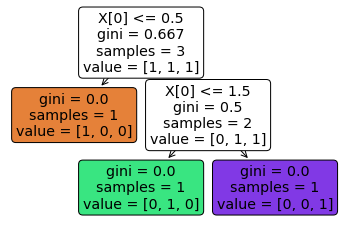

In [18]:
from sklearn import tree

X,y = [[0,0],[1,1],[2,2]], [0,1,2]

# predict class of samples
clf = tree.DecisionTreeClassifier(); clf.fit(X,y)
print(clf.predict([[0.6,2.0]]))

# predict probability of prediction
print(clf.predict_proba([[0.6,2.0]]))

# plot the tree
tree.plot_tree(clf, rounded=True, filled=True)

### Graphviz inline rendering

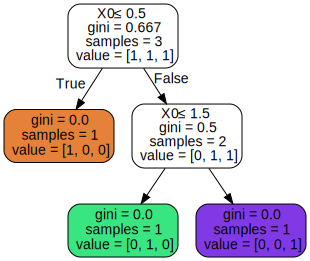

In [20]:
import graphviz
data = tree.export_graphviz(clf, 
                            out_file=None,
                            filled=True,
                            rounded=True,
                            special_characters=True)
file = graphviz.Source(data)
file

### Graphviz rendering to PDF
file.render("example-tree")

In [22]:
# Exporting to text format
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_text

iris = load_iris()
dt = DTC(random_state=0, max_depth=3)
dt = dt.fit(iris.data, iris.target)
r = export_text(dt, feature_names=iris['feature_names'])
print(r)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### Example: Plot DT decision surface - iris dataset

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

# Params
n_classes, plot_colors, plot_step = 3, "ryb", 0.02
iris = load_iris()

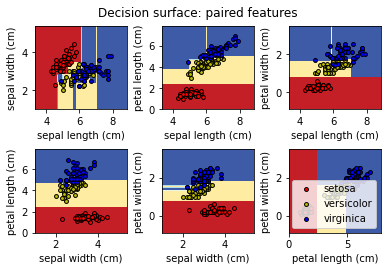

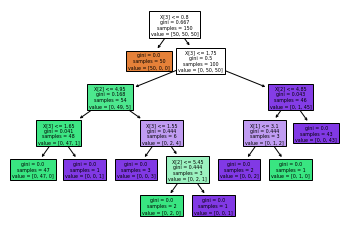

In [24]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DTC().fit(X, y)

    plt.subplot(2, 3, pairidx + 1) # decision boundry

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], 
                    X[idx, 1], 
                    c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface: paired features")
plt.legend(loc='lower right')
plt.axis("tight")
plt.figure()

clf = DTC().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

### [DT Regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- Same principles as DT Classification, except y (labels) are expected to be floating point values.

shapes:	 X:	 (80, 1) 	y:	 (80,)


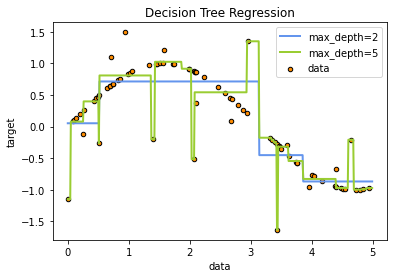

In [34]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR
import matplotlib.pyplot as plt

# Create a noisy sinusoidal dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

print("shapes:\t X:\t",X.shape,"\ty:\t",y.shape)

y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DTR(max_depth=2); regr_1.fit(X, y)
regr_2 = DTR(max_depth=5); regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen",    label="max_depth=5", linewidth=2)

plt.xlabel("data"); plt.ylabel("target"); plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Multiple-output Decision Trees
- Supervised learning problem with multiple outputs to predict
- Y is a 2D array of (#samples, #outputs)
- If no correlation between the outputs, the simplest solution is to build $n$ independent models - one per output.
- If correlation is suspected, it's often better to build a single, multi-output-capable model by storing $n$ output values in leaves (instead of one), and by using an *average reduction* criteria for splitting.
- [DTC](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) both support multiple outputs.
- Outputs:
    - `predict`: a list of n output values
    - `predict_proba`: a list of n arrays of class probabilities

### Example: multi-output regression
- Dataset is a circle with one underlying feature
- Note how overfit occurs if `max_depth` is set too high.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR

# Noisy circle dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), 
              np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
rgr_1, rgr_2, rgr_3 = DTR(max_depth=2), DTR(max_depth=5), DTR(max_depth=8)

rgr_1.fit(X, y); rgr_2.fit(X, y); rgr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = rgr_1.predict(X_test)
y_2 = rgr_2.predict(X_test)
y_3 = rgr_3.predict(X_test)

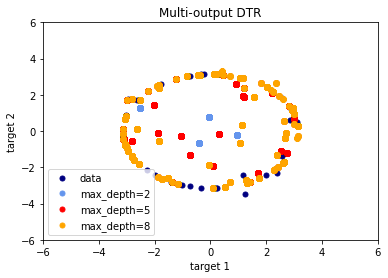

In [36]:
plt.figure()
s = 25

plt.scatter(y[  :, 0], y[  :, 1], c="navy",           s=s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red",            s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange",         s=s, label="max_depth=8")

plt.xlim([-6, 6]);         plt.ylim([-6, 6])
plt.xlabel("target 1");    plt.ylabel("target 2")

plt.title("Multi-output DTR"); plt.legend(loc="best"); plt.show()

### Example: face image completion using ExtraTreesRegressor

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor as ETR

In [49]:
# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]

X_train = train[:, :(n_pixels+1) // 2] #upper half of faces
y_train = train[:,   n_pixels    // 2:] # Lower half of the faces

X_test = test[  :, :(n_pixels+1) // 2]
y_test = test[  :,   n_pixels    // 2:]

In [43]:
estimator = ETR(n_estimators=10, max_features=32, random_state=0)
estimator.fit(X_train,y_train)
y_test_prediction = estimator.predict(X_test)

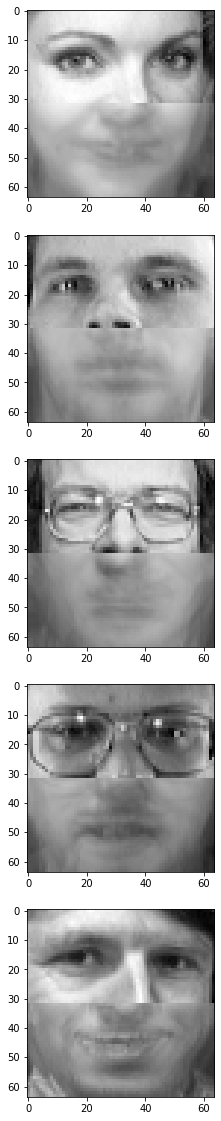

In [57]:
image_dims=(64,64)
plt.figure(figsize=(20,20))

for i in range(n_faces):
    
    sub = plt.subplot(n_faces,1,i+1)
    
    true_face      = np.hstack((X_test[i], y_test[i]))
    completed_face = np.hstack((X_test[i], y_test_prediction[i]))
    
    sub.imshow(true_face.reshape(image_dims), 
               cmap=plt.cm.gray, 
               interpolation="nearest")
    
    sub.imshow(completed_face.reshape(image_dims), 
               cmap=plt.cm.gray, 
               interpolation="nearest")
    


### Complexity
- Binary tree build time: $O(n_{samples}n_{features}\log(n_{samples}))$
- Binary tree query time: $O(\log(n_{samples}))$
- Trees will not always be balanced. assuming balanced subtrees, the cost of searching each node for the largest reduction of entropy is $O(n_{features}n_{samples}\log(n_{samples}))$ per node.

### DT Algorithms
- [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) creates a multiway tree & finds the categorical feature that yields a maximum categorical information gain for each node. Trees are grown to a maximum size, then pruned to improve the tree's ability to generalize on unknown data.

- **C4.5** succeeded ID3 and removed the categorical variable restriction. It converts trained trees into sets of if-then rules, which are evaluated to determine an application order. Pruning is done by removing a rule's precondition if accuracy improves without it.

- **C5.0** succeeeds C4.5. It is available under a proprietary license.

- [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) is similar to C4.5 & supports numerical (regression) targets. It builds binary trees using the feature & threshold that yields the largest information gain at each node. Scikit-Learn uses an optimized version of CART.

- The quality of a candidate split of a node is found with an **impurity** or loss function $H()$. How $H()$ is computed depends on the task being solved.

- If a target is a classification outcome, $p_{mk}$ is the proportion of class $k$ observations in node $m$. $p_{mk} = 1/ N_m \sum_{y \in Q_m} I(y = k)$. Here are the most common criteria for classification-based splits.

    - **Gini**: $H(Q_m) = \sum_k p_{mk} (1 - p_{mk})$
    - **Entropy**: $H(Q_m) = - \sum_k p_{mk} \log(p_{mk})$
    - **Misclassification**: $H(Q_m) = 1 - \max(p_{mk})$
    
    
- If the target is a continuous (regression) value, here are the most common criteria for regression-based splits:

    - **Mean Squared Error (MSE, aka L2 error)**: $ \begin{align}\begin{aligned}\bar{y}_m = \frac{1}{N_m} \sum_{y \in Q_m} y\\H(Q_m) = \frac{1}{N_m} \sum_{y \in Q_m} (y - \bar{y}_m)^2\end{aligned}\end{align} $
    - **Poisson deviance**: $H(Q_m) = \frac{1}{N_m} \sum_{y \in Q_m} (y \log\frac{y}{\bar{y}_m}
- y + \bar{y}_m)$
        - Using `criteria="poisson"` is recommended if your target is a count or frequency. $y>=0$ is required for this criterion. It fits much slower than MSE.
        
    - **Mean Absolute Error (MAE)**: $ \begin{align}\begin{aligned}median(y)_m = \underset{y \in Q_m}{\mathrm{median}}(y)\\H(Q_m) = \frac{1}{N_m} \sum_{y \in Q_m} |y - median(y)_m|\end{aligned}\end{align} $
        - MAE also fits much slower than MSE.

### Minimal cost-complexity Pruning
- Used to prune trees to avoid overfitting.
- Controlled with parameter $\alpha>=0$ (complexity), which defines a cost-complexity measure of a tree $T$: $R_\alpha(T) = R(T) + \alpha|\widetilde{T}|$
- $|\widetilde{T}|$ is the number of terminal nodes in $T$.
- $R(T)$ is the total misclassification rate of the terminal nodes.
- Non-terminal nodes with the smallest *effective alpha* value are pruned.
- The process stops when the tree's minimal effective alpha is greater than `ccp_alpha`.

### Example: Minimal cost-complexity pruning
- Demonstrate the effect of `ccp_alpha` on tree regularization
- Demonstrate how to choose `ccp_alpha` with validation scores

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

- use [cost_complexity_pruning_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to find the effective alphas & corresponding leaf impurities at each step of the pruning process.
- As alpha increases, more of the tree is pruned - which increases total impurity.

In [60]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = TTS(X, y, random_state=0)

clf                    = DTC(random_state=0)
path                   = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

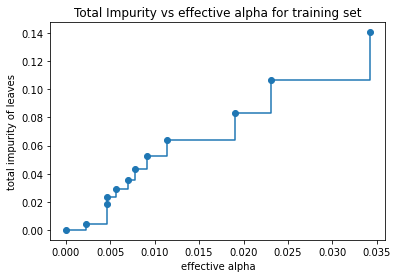

In [61]:
# max effective alpha is removed - it represents a single node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

- Train a DT using the effective alphas. 
- The last value in `ccp_alphas` will prune the entire tree - leaving it (`clfs[-1]`) with a single node.

In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DTC(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("#nodes in the last tree: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, 
        ccp_alphas[-1]))

#nodes in the last tree: 1 with ccp_alpha: 0.3272984419327777


- Show the #nodes & tree depth as alpha increases:

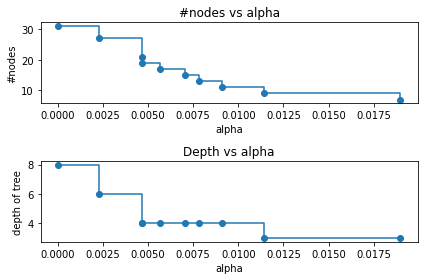

In [65]:
clfs        = clfs[:-1]
ccp_alphas  = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth       = [clf.tree_.max_depth for clf in clfs]
fig, ax     = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("#nodes")
ax[0].set_title("#nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- When using the DT Classifier with `ccp_alpha=0` and all other parameters set to their defaults, the tree will overfit.
- As alpha increaes & the tree is pruned, the tree will become better at generalization. `ccp_alpha=0.015` should provide a max testing accuracy.

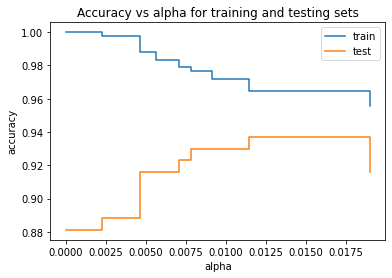

In [66]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test)  for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha"); ax.set_ylabel("accuracy")

ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores,  label="test",  drawstyle="steps-post")

ax.legend(); plt.show()